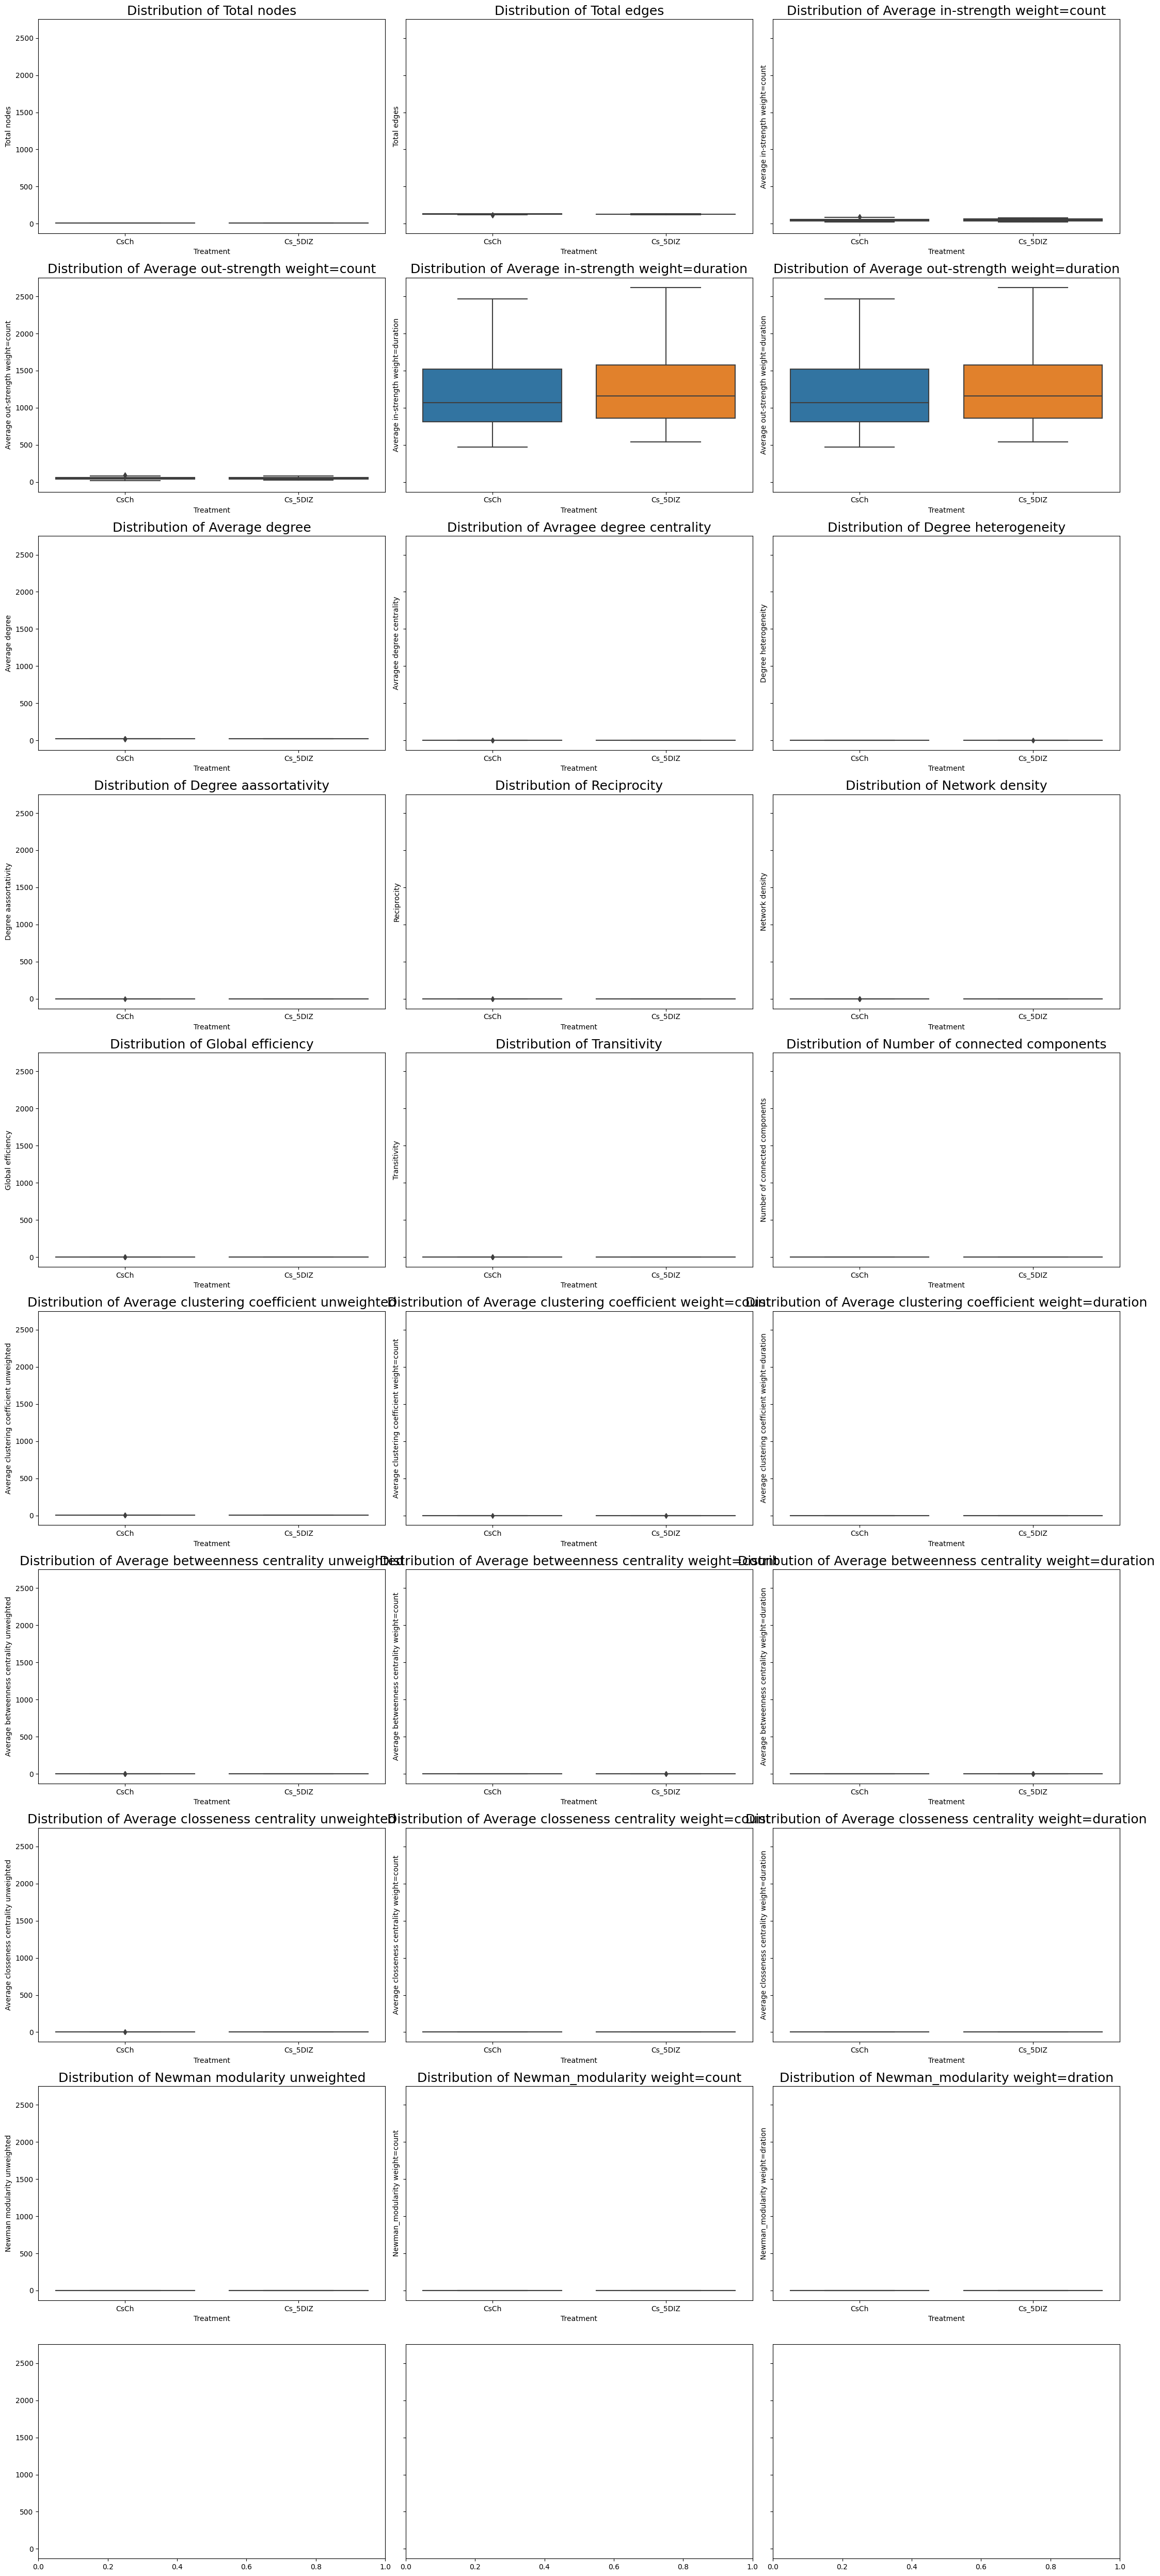

In [1]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
import toml
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src import settings
from src.utils import fileio

CONFIG_PATH = os.path.join(settings.CONFIG_DIR, "main.toml")
with open(CONFIG_PATH, "r") as file:
    config = toml.load(file)  

INPUT_PATH = os.path.join(settings.RESULTS_DIR, "global_measures")
all_treatments = fileio.load_files_from_folder(INPUT_PATH)

# Initialize a list to store dataframes for selected treatments
dataframes = []

for treatment_name, treatment_path in all_treatments.items():
    treatment_name = treatment_name.replace(".csv", "")
    if treatment_name in config["TREATMENTS"]:
        df = pd.read_csv(treatment_path, index_col=0)
        df['Treatment'] = treatment_name
        dataframes.append(df)

combined_data = pd.concat(dataframes)
combined_data_reset = combined_data.reset_index()
measure_names = combined_data.columns.tolist()

num_plots = len(measure_names)
num_rows = (num_plots + 2) // 3
num_cols = min(3, num_plots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(22, 5 * num_rows), sharey=True)
axes = axes.flatten()

for i, measure_name in enumerate(measure_names):
    if measure_name == "Treatment":
        continue
    ax = axes[i]
    sns.boxplot(data=combined_data_reset, x="Treatment", y=measure_name, ax=ax)
    ax.set_xlabel("Treatment")
    ax.set_ylabel(measure_name)
    ax.set_title(f'Distribution of {measure_name}', fontsize=18)

plt.tight_layout()
plt.show()